In [25]:

import xarray as xr
xr.set_options(display_style="text")
xr.__version__

'2024.3.0'

In [26]:
import regionmask
regionmask.__version__

'0.12.1'

In [48]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import regionmask
np.set_printoptions(edgeitems=2)

In [28]:


# Reemplaza 'ruta/a/tu/archivo.nc' con la ruta real a tu archivo NetCdata
ds = xr.open_dataset("Datos\Land_and_Ocean_EqualArea.nc")
print(ds)
ds.close()


<xarray.Dataset> Size: 135MB
Dimensions:      (map_points: 15984, time: 2089, month_number: 12)
Coordinates:
    longitude    (map_points) float32 64kB ...
    latitude     (map_points) float32 64kB ...
  * time         (time) float64 17kB 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: map_points, month_number
Data variables:
    land_mask    (map_points) float64 128kB ...
    temperature  (time, map_points) float32 134MB ...
    climatology  (month_number, map_points) float32 767kB ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               20-Feb-2024 09:56:45
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   07-Feb-2024 05:19:02
    ocean_source_history:  20-Feb-2024 08:20:00
    comment:               This file contains Berkeley Earth surface temperat...


In [30]:
regionmask.defined_regions.ar6

ar6_all = regionmask.defined_regions.ar6.all
ar6_all

<regionmask.Regions 'AR6 reference regions'>
Source:   Iturbide et al., 2020 (ESSD)
overlap:  False

Regions:
 0 GIC      Greenland/Iceland
 1 NWN      N.W.North-America
 2 NEN      N.E.North-America
 3 WNA        W.North-America
 4 CNA        C.North-America
..  ..                    ...
53 ARS            Arabian-Sea
54 BOB          Bay-of-Bengal
55 EIO Equatorial.Indic-Ocean
56 SIO          S.Indic-Ocean
57 SOO         Southern-Ocean

[58 regions]

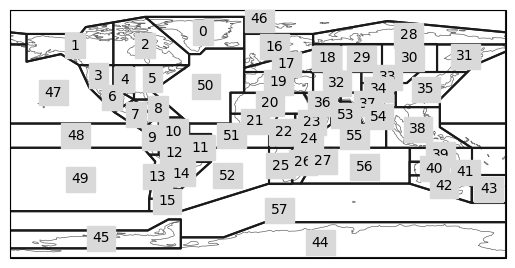

In [31]:

ax = ar6_all.plot()

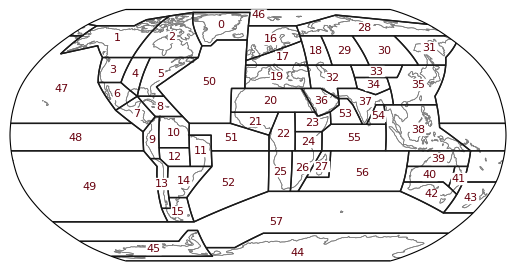

In [33]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))

text_kws = dict(color="#67000d", fontsize=8, bbox=dict(pad=0.2, color="w"))

ax = ar6_all.plot(
    ax=ax,
    add_ocean=False,
    line_kws=dict(linewidth=1),
    #coastlines=False,
    text_kws=text_kws,
)

ax.coastlines(color="0.5", lw=0.5);

<GeoAxesSubplot: >

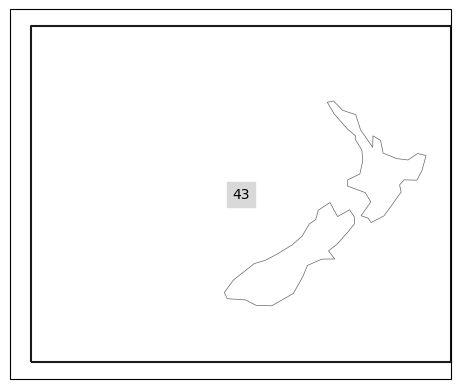

In [66]:
new_zealand = ar6_all[[43]]
new_zealand.plot()


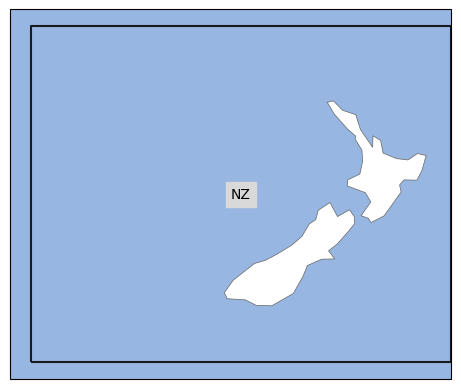

In [69]:
projection = ccrs.PlateCarree(central_longitude=180)

# Crea una figura y un objeto Axes con la proyección deseada
#fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': projection})

# Aquí puedes agregar tus datos. Ejemplo de cómo agregar un borde de costa a tu mapa:
ax.coastlines()

new_zealand.plot(label="abbrev", add_ocean=True)
# Establece el alcance geográfico del mapa
ax.set_extent([120, 185, -20, -60], crs=ccrs.PlateCarree())

# Opcional: Agrega características como océanos y tierras
#ax.add_feature(ccrs.OCEAN)
#ax.add_feature(ccrs.feature.LAND, edgecolor='black')

In [65]:
australasia = ar6_all[["NZ", "SEA", "NAU", "C.Australia", "SAU"]]
australasia

<regionmask.Regions 'AR6 reference regions'>
Source:   Iturbide et al., 2020 (ESSD)
overlap:  False

Regions:
38 SEA    S.E.Asia
39 NAU N.Australia
40 CAU C.Australia
42 SAU S.Australia
43  NZ New-Zealand

[5 regions]

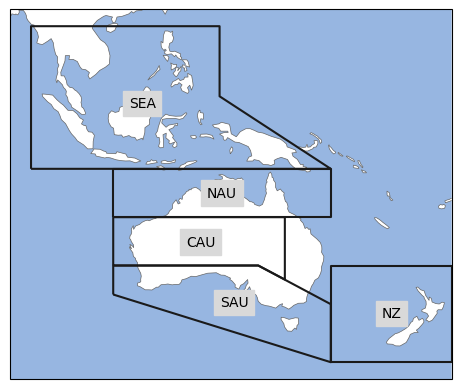

In [70]:
projection = ccrs.PlateCarree(central_longitude=180)

# Crea una figura y un objeto Axes con la proyección deseada
#fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': projection})

# Aquí puedes agregar tus datos. Ejemplo de cómo agregar un borde de costa a tu mapa:
ax.coastlines()

australasia.plot(label="abbrev", add_ocean=True)
# Establece el alcance geográfico del mapa
ax.set_extent([120, 185, -20, -60], crs=ccrs.PlateCarree())

# Opcional: Agrega características como océanos y tierras

In [205]:
import numpy as np
ds = xr.open_dataset("Datos\Land_and_Ocean_EqualArea.nc")
ds.info()

xarray.Dataset {
dimensions:
	map_points = 15984 ;
	time = 2089 ;
	month_number = 12 ;

variables:
	float32 longitude(map_points) ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
		longitude:long_name = Longitude ;
	float32 latitude(map_points) ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
		latitude:long_name = Latitude ;
	float64 time(time) ;
		time:units = year A.D. ;
		time:standard_name = time ;
		time:long_name = Time ;
	float64 land_mask(map_points) ;
		land_mask:units = none ;
		land_mask:standard_name = land_mask ;
		land_mask:long_name = Land Mask ;
		land_mask:valid_min = 0.0 ;
		land_mask:valid_max = 1.0 ;
	float32 temperature(time, map_points) ;
		temperature:units = degree C ;
		temperature:standard_name = surface_temperature_anomaly ;
		temperature:long_name = Air Surface Temperature Anomaly ;
		temperature:valid_min = -17.581396970370164 ;
		temperature:valid_max = 23.203125874201458 ;
	float32 climatology(month_n

In [204]:


# Usar el valor entero (parte entera) de los tiempos flotantes como aproximación a "año"
# Esto asume que el año está representado directamente como un número flotante
years_approx = np.floor(ds['time'])

# Agrupar por estos años aproximados y calcular la media de la temperatura
temp = ds['temperature'].groupby(years_approx).mean('time')


temp

<xarray.DataArray 'temperature' (time: 175, map_points: 15984)> Size: 11MB
array([[       nan,        nan, ...,        nan,        nan],
       [       nan,        nan, ...,        nan,        nan],
       ...,
       [ 2.7273686,  2.6766558, ...,  1.3121489,  1.0617033],
       [ 2.2762094,  2.031323 , ..., -2.2443862, -2.2738068]],
      dtype=float32)
Coordinates:
    longitude  (map_points) float32 64kB ...
    latitude   (map_points) float32 64kB ...
  * time       (time) float64 1kB 1.85e+03 1.851e+03 ... 2.023e+03 2.024e+03
Dimensions without coordinates: map_points
Attributes:
    units:          degree C
    standard_name:  surface_temperature_anomaly
    long_name:      Air Surface Temperature Anomaly
    valid_min:      -17.581396970370164
    valid_max:      23.203125874201458

In [ ]:
ar6_land = regionmask.defined_regions.ar6.land

In [206]:
fN = ("datos/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc") 

ds = xr.open_dataset(fN)

ds

<xarray.Dataset> Size: 65MB
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    tas        (time, lat, lon) float32 65MB ...
Attributes: (12/53)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/872062df-acae-499b-aa0f-9eaca76...
    variable_id:                 tas
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

In [197]:
tas = ds.tas
# calculate annual mean
tas = tas.groupby("time.year").mean("time")
tas = tas.rename(year="time")

# convert to celsius
tas = tas - 273.15

tas

<xarray.DataArray 'tas' (time: 165, lat: 64, lon: 128)> Size: 5MB
array([[[-45.430008, -45.761246, ..., -44.75174 , -45.091705],
        [-45.896744, -46.590225, ..., -44.218903, -45.101715],
        ...,
        [-17.36702 , -17.171188, ..., -17.895187, -17.624313],
        [-18.64714 , -18.557785, ..., -18.7753  , -18.694626]],

       [[-44.4169  , -44.72325 , ..., -43.792145, -44.099274],
        [-44.805893, -45.43962 , ..., -43.2538  , -44.080124],
        ...,
        [-16.245056, -16.032959, ..., -16.703278, -16.45105 ],
        [-17.691727, -17.641739, ..., -17.772202, -17.741959]],

       ...,

       [[-42.882904, -43.175674, ..., -42.251236, -42.573135],
        [-43.605988, -44.256134, ..., -41.999786, -42.84581 ],
        ...,
        [-14.617554, -14.334442, ..., -15.218384, -14.910461],
        [-15.229614, -15.190063, ..., -15.348999, -15.286438]],

       [[-42.611115, -42.900314, ..., -42.01175 , -42.32065 ],
        [-42.784317, -43.42357 , ..., -41.23117 , -42.06967 ],
        ...,
        [-13.792969, -13.55722 , ..., -14.30069 , -14.045441],
        [-14.829285, -14.778809, ..., -14.893127, -14.84668 ]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon      (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height   float64 8B ...
  * time     (time) int64 1kB 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014

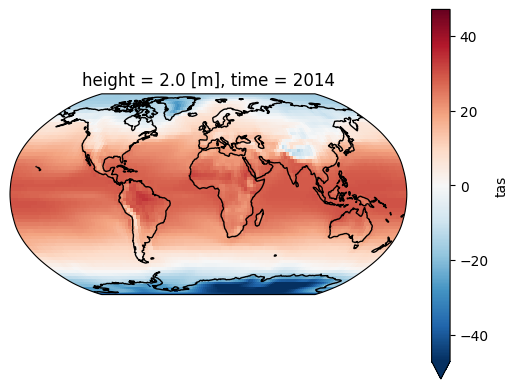

In [186]:
proj = ccrs.Robinson()

f, ax = plt.subplots(subplot_kw=dict(projection=proj))

h = tas.isel(time=-1).plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), robust=True, center=0
)


ax.coastlines();

In [79]:
ar6_land = regionmask.defined_regions.ar6.land

In [80]:
mask_2D = ar6_land.mask(tas)

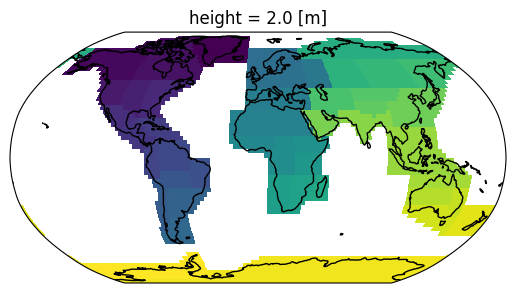

In [81]:
proj = ccrs.Robinson()
f, ax = plt.subplots(subplot_kw=dict(projection=proj))

h = mask_2D.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)

ax.coastlines()

ar6_land.plot_regions(line_kws=dict(lw=0.5), add_label=False);

In [82]:
mask_3D = ar6_land.mask_3D(tas)
mask_3D

<xarray.DataArray 'mask' (region: 46, lat: 64, lon: 128)> Size: 377kB
array([[[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       ...,

       [[ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]]])
Coordinates:
  * lat      (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
    height   float64 8B 2.0
  * lon      (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * region   (region) int32 184B 0 1 2 3 4 5 6 7 8 ... 38 39 40 41 42 43 44 45
    abbrevs  (region) <U4 736B 'GIC' 'NWN' 'NEN' 'WNA' ... 'NZ' 'EAN' 'WAN'
    names    (region) <U22 4kB 'Greenland/Iceland' ... 'W.Antarctica'
Attributes:
    standard_name:  region

C:\Users\danie\AppData\Local\Temp\ipykernel_22676\2507905925.py:15: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flatten():


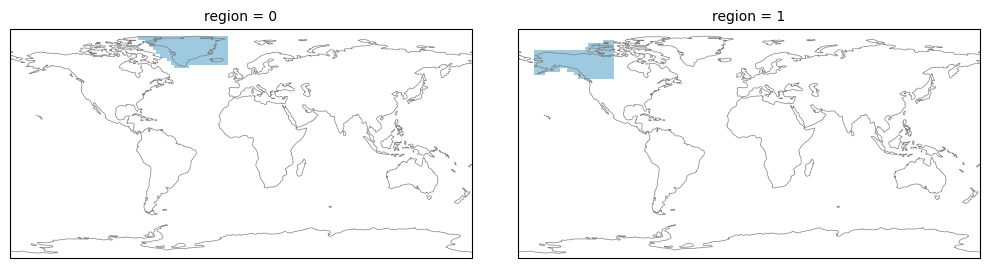

In [83]:
from matplotlib import colors as mplc

cmap1 = mplc.ListedColormap(["none", "#9ecae1"])

fg = mask_3D.isel(region=slice(2)).plot(
    subplot_kws=dict(projection=ccrs.PlateCarree()),
    col="region",
    col_wrap=2,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    aspect=1.5,
    cmap=cmap1,
)

for ax in fg.axes.flatten():
    ax.coastlines(lw=0.5, color="0.5")

fg.fig.subplots_adjust(hspace=0, wspace=0.1);

In [87]:
# 1) by the index of the region:
r30 = mask_3D.sel(region=30)

# 2) with the abbreviation
r2 = mask_3D.isel(region=(mask_3D.abbrevs == "CNA"))

# 3) with the long name:
r3 = mask_3D.isel(region=(mask_3D.names == "C.North-America"))

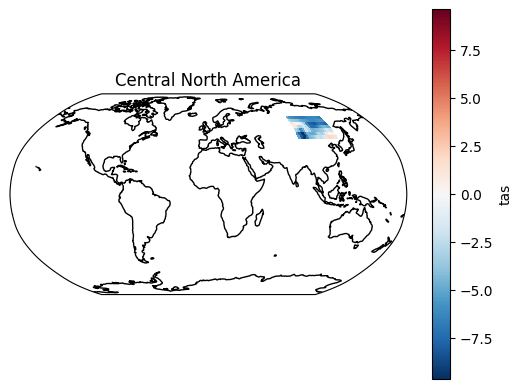

In [88]:
tas_CNA = tas.where(r30)

proj = ccrs.Robinson()

ax = plt.subplot(111, projection=proj)

tas_CNA.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())

ax.set_title("Central North America")

ax.coastlines();

In [89]:

weights = np.cos(np.deg2rad(tas.lat))

tas_regional = tas.weighted(mask_3D * weights).mean(dim=("lat", "lon"))

In [90]:
tas_regional

<xarray.DataArray 'tas' (time: 165, region: 46)> Size: 61kB
array([[-14.34435989,  -4.57573997, ..., -32.31694793, -20.89343577],
       [-14.05052335,  -5.25600597, ..., -31.61877546, -21.7574261 ],
       ...,
       [-12.404766  ,  -2.08977824, ..., -29.92128283, -18.47642827],
       [-11.14616891,  -2.25170586, ..., -29.97843364, -19.29482384]])
Coordinates:
    height   float64 8B 2.0
  * time     (time) int64 1kB 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * region   (region) int32 184B 0 1 2 3 4 5 6 7 8 ... 38 39 40 41 42 43 44 45
    abbrevs  (region) <U4 736B 'GIC' 'NWN' 'NEN' 'WNA' ... 'NZ' 'EAN' 'WAN'
    names    (region) <U22 4kB 'Greenland/Iceland' ... 'W.Antarctica'

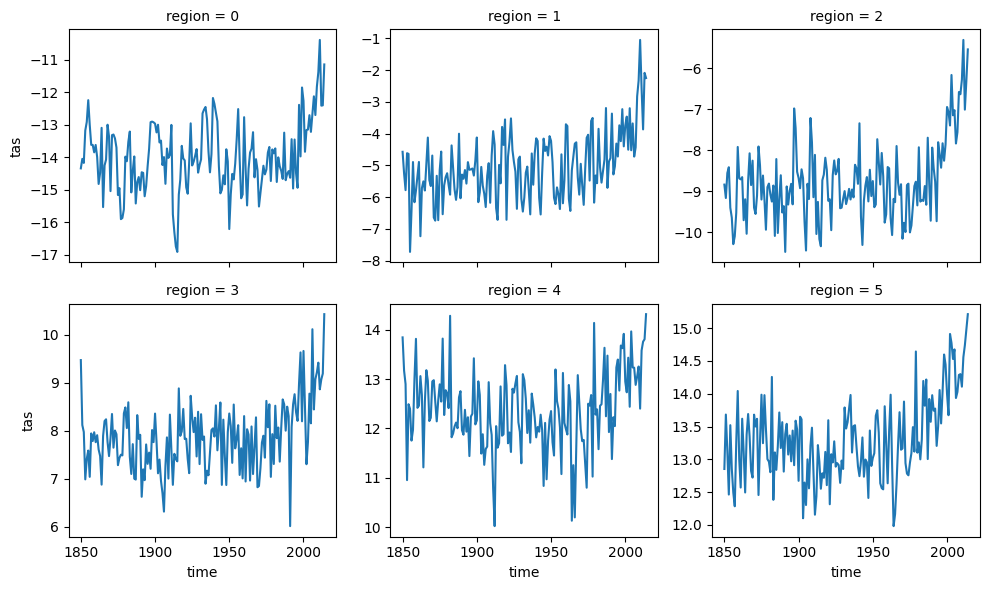

In [91]:
tas_regional.isel(region=slice(6)).plot(col="region", col_wrap=3, sharey=False);

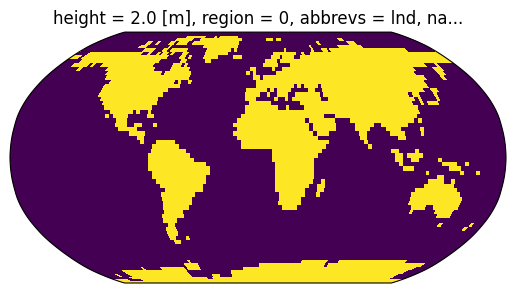

In [93]:
land_110 = regionmask.defined_regions.natural_earth_v5_0_0.land_110

land_mask = land_110.mask_3D(tas)

# add a plot
ax = plt.axes(projection=ccrs.Robinson())
land_mask.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False);

In [94]:
mask_lsm = mask_3D * land_mask.squeeze(drop=True)

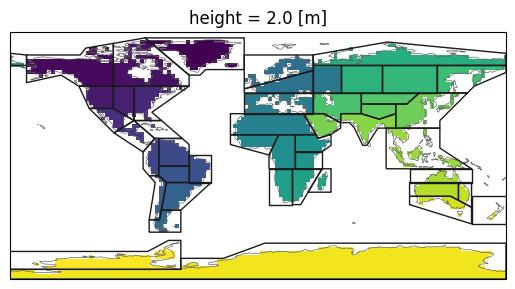

In [96]:
ar6_land.plot(add_label=False, line_kws=dict(lw=1))

regionmask.plot_3D_mask(mask_lsm, transform=ccrs.PlateCarree(), add_colorbar=False);

In [97]:

tas_regional_land = tas.weighted(mask_lsm * weights).mean(dim=("lat", "lon"))

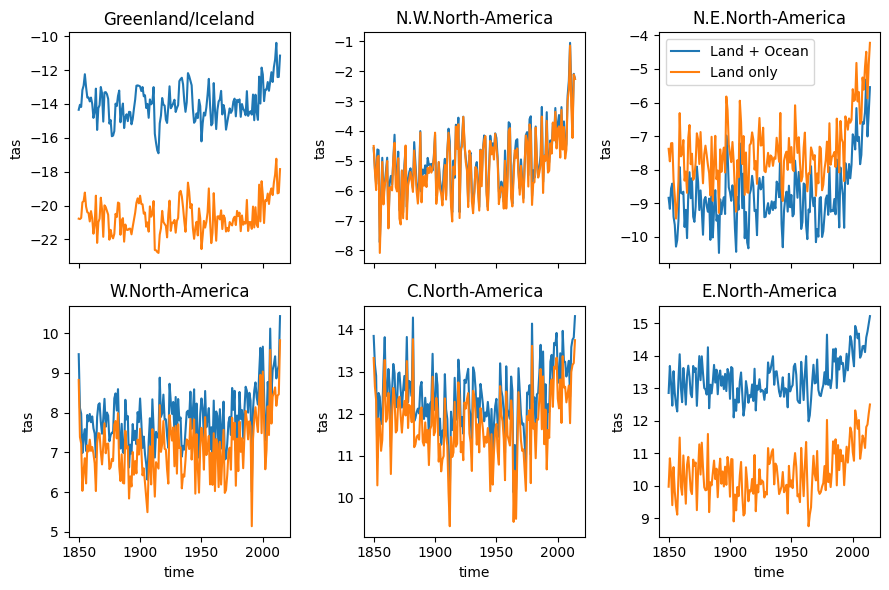

In [98]:
f, axes = plt.subplots(2, 3, sharex=True, figsize=(9, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):

    ds = tas_regional.isel(region=i)
    ds.plot(ax=ax, label="Land + Ocean")

    ds = tas_regional_land.isel(region=i)
    ds.plot(ax=ax, label="Land only")

    ax.set_title(ds.names.values)
    if i < 3:
        ax.set_xlabel("")

axes[2].legend()
plt.tight_layout()

In [122]:
# Reemplaza 'ruta/a/tu/archivo.nc' con la ruta real a tu archivo NetCdata
ds = xr.open_dataset("Datos\Complete_TAVG_EqualArea.nc")
ds



<xarray.Dataset> Size: 73MB
Dimensions:      (map_points: 5498, time: 3290, month_number: 12)
Coordinates:
    longitude    (map_points) float32 22kB ...
    latitude     (map_points) float32 22kB ...
  * time         (time) float64 26kB 1.75e+03 1.75e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: map_points, month_number
Data variables:
    land_mask    (map_points) float64 44kB ...
    temperature  (time, map_points) float32 72MB ...
    climatology  (month_number, map_points) float32 264kB ...
Attributes:
    Conventions:          Berkeley Earth Internal Convention (based on CF-1.5)
    title:                Native Format Berkeley Earth Surface Temperature An...
    history:              09-Mar-2024 09:19:16
    institution:          Berkeley Earth Surface Temperature Project
    source_file:          Complete_TAVG.50719s.20240309T090707.mat
    source_history:       06-Mar-2024 05:19:15
    source_data_version:  eead777c589734c11a431a21725e06d3
    comment:              This file contains Berkeley Earth surface temperatu...

In [125]:
import netCDF4 as nc
from datetime import datetime, timedelta



# Lee la variable de tiempo
#time_var = ds.variables['tiempo']  # Asumiendo que la variable de tiempo se llama 'tiempo'

# Obtiene las unidades de tiempo y la fecha de referencia
time_units = time_var.units  # Por ejemplo: 'days since 2000-01-01 00:00:00'
time_reference = nc.num2date(0, time_units)

print(f"Fecha de referencia: {time_reference}")

# Convierte todos los valores de tiempo a objetos datetime
times = nc.num2date(time_var[:], time_var.units)

# Muestra las primeras y últimas fechas para verificar
print(f"Primera fecha: {times[0]}")
print(f"Última fecha: {times[-1]}")


AttributeError: 'IndexVariable' object has no attribute 'units'